# ITA - PEDS

## Machine Learning

* MSc. Adriano Henrique Rossette Leite (contato@adrianohrl.tech)
* MSc. Túlio Lima S. M. Silva (tulio.madereira-silva@itau-unibanco.com.br)
* Prof. Dr. Carlos Henrique Quartucci Forster (forster@ita.br)

---

### Classificação  da base de dados MNIST

O banco de dados MNIST de dígitos escritos à punho (disponível em: http://yann.lecun.com/exdb/mnist/, acessado em: 12/07/2018) possui um conjunto para treinamento de 60000 exemplos e um conjunto para teste de 10000 de exemplos. Este é um subconjunto de um conjunto maior disponível em NIST. Os dígitos estão normalizados pelo tamanho e centralizados em um tamanho fixo de imagem.

---

### Imagens Digitais

As imagens digitais podem ser representadas computacionalmente como matrizes. Cada elemento, denominado *pixel*, possui um valor numérico associado à intensidade de uma componente de cor particular. Desta forma, o número de linhas e de colunas da matriz equivalem, respectivamente, à altura e à largura da imagem. Assim, a intensidade de um dado *pixel* na imagem pode ser acessado a partir do número de linha e de coluna desejados. Como cada *pixel* possui tamanho de 1 *byte* (que se equivale à 8 *bits*), as intensidade de cores são valores compreendidos entre 0 e 255. 

Existem diversos modelos de cores que podem ser utilizados para representar imagens coloridas. O modelo RGB, por exemplo, representa uma imagem digital colorida a partir de três componentes de cores vermelho (R), verde (G) e azul (B). Neste caso, a imagem digital é composta por três matrizes bidimensionais, uma matriz para cada componente de cor. 

Uma imagem digital em níveis de cinza é representada por apenas uma matriz bidimensional, onde seus *pixels* possuem valores entre 0 e 255. Por um lado, quanto mais próximo de 0, o *pixel* se aproxima da cor preta e, por outro, quanto mais próximo de 255, o *pixel* se aproxima mais da cor branca. Os valores intermediários deste intervalo variam o nível de clareamento da cor cinza. 

Outro tipo de imagem digital existente é a imagem digital binária. Este tipo de imagem é representado por matrizes lógicas, onde seus *pixels* podem ser pretos (valor de intensidade igual à 0) ou brancos (valor de intensidade igual à 1).

A representação de imagens digitais da base MNIST são em níveis de cinza.

---

### Importação dos arquivos da base de dados MNIST

Primeiramente, faz se necessário definir as funções que importarão os dados da base MNIST corretamente. Para isso, a função *readMNIST* deve ser utilizada. Essa função possui apenas um único parâmetro de entrada, *filenames*. Este parâmetro de entrada é um dicionário cujas palavras-chaves são:

* *images*: identifica o caminho para o arquivo que contém as imagens 28 *pixels* e 28 *pixels* dos dígitos entre 0 e 9;
* e *labels*: identifica o caminho para o arquivo que contém os rótulos de cada imagem 28 *pixels* por 28 *pixels* domínio está necessariamente entre 0 e 9. Em ambos casos, considera-se que o formato do arquivo a ser importado segue a formatação IDX.

O método *readMNIST* retorna as imagens e seus respectivos rótulos. As imagens são retornadas em um *array* cujas dimensões são *nimgs* por *nrows* vezes *ncols*, onde: 

* *nimgs* é o número de imagens importadas;
* *nrows* é a altura (em *pixels*) das imagens importadas;
* e *ncols* é o comprimento (em *pixels*) das imagens importadas;

Por outro lado, os rótulos são retornados em um *array* cujas dimensões são 1 por *nimgs*, onde: *nimgs* corresponde ao número de imagens importadas. A seguir, as bibliotecas *struct* e *numpy* foram importadas no projeto para definição da função *readMNIST*.

In [1]:
import struct as st
import numpy as np

def readMNIST(filenames):
    imgs = None
    with open(filenames['images'], 'rb') as imgs_file:
        imgs_file.seek(0)
        _, nimgs, nrows, ncols = st.unpack('>IIII', imgs_file.read(4 * 4))
        imgs = np.fromfile(imgs_file, dtype=np.uint8).reshape(nimgs, nrows * ncols)
        imgs_file.close()
    lbls = None
    with open(filenames['labels'], 'rb') as lbls_file:
        lbls_file.seek(0)
        _, nlbls = st.unpack('>II', lbls_file.read(4 * 2))
        lbls = np.fromfile(lbls_file, dtype=np.uint8)
        lbls_file.close()
    return imgs, lbls    

---

### Visualização de Imagens Digitais no *Python*

Sabendo que uma imagem digital é representada Note que as imagens importadas não são armazenadas como uma lista de imagens, 

In [2]:
import matplotlib.pyplot as plt

height = 28
width = 28

def imshow(image, label='', cmap='gray', xlabel='', ylabel=''):
    plt.imshow(255 - image.reshape(height, width), cmap)
    plt.title(label)
    plt.xticks([])
    plt.xlabel(xlabel)
    plt.yticks([])
    plt.ylabel(ylabel)

---
### Estrutura do projeto

Este projeto foi organizado da seguinte forma: sua pasta raiz possui três sub-pastas, *datasets*, *references* e *src*. A pasta *datasets* contém as bases de imagens e respectivos rótulos do MNIST para as fases treinamento e teste. A pasta *reference* contém materiais pertinentes para o estudo sobre o assunto deste projeto. A pasta *src* contém este arquivo Jupyter Notebook.

---
### Importação das bases de treinamento e teste do MNIST

A seguir, é feita a leitura dos arquivos da base MNIST tanto das imagens e dos rótulos do treinamento quanto do teste, conforme descrito anteriormente. 

In [3]:
train_filenames = {'images': '../datasets/train-images.idx3-ubyte', 'labels': '../datasets/train-labels.idx1-ubyte'}
test_filenames = {'images': '../datasets/test-images.idx3-ubyte', 'labels': '../datasets/test-labels.idx1-ubyte'}

train_imgs, train_lbls = readMNIST(train_filenames)
test_imgs, test_lbls = readMNIST(test_filenames)
labels = set(train_lbls)

A fim de exemplificar a utilização do método de visualização das imagens carregadas, a primeira imagem do conjunto de treinamento é selecionada para ser visualizada, conforme se segue.

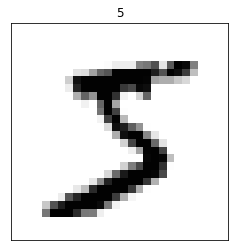

In [4]:
index = 0
image = train_imgs[index]
label = train_lbls[index]

imshow(image, label)

---
### Cálculo das Imagens Médias para cada Rótulo

Foram calculadas as imagens médias para cada um dos rótulos.

In [5]:
mean_train_imgs = np.zeros((len(labels), width * height))
for i in range(len(labels)):
    mean_train_imgs[i, :] = np.mean(train_imgs[train_lbls == i, :], axis=0)

Visualizando as imagens médias de cada rótulo temos:

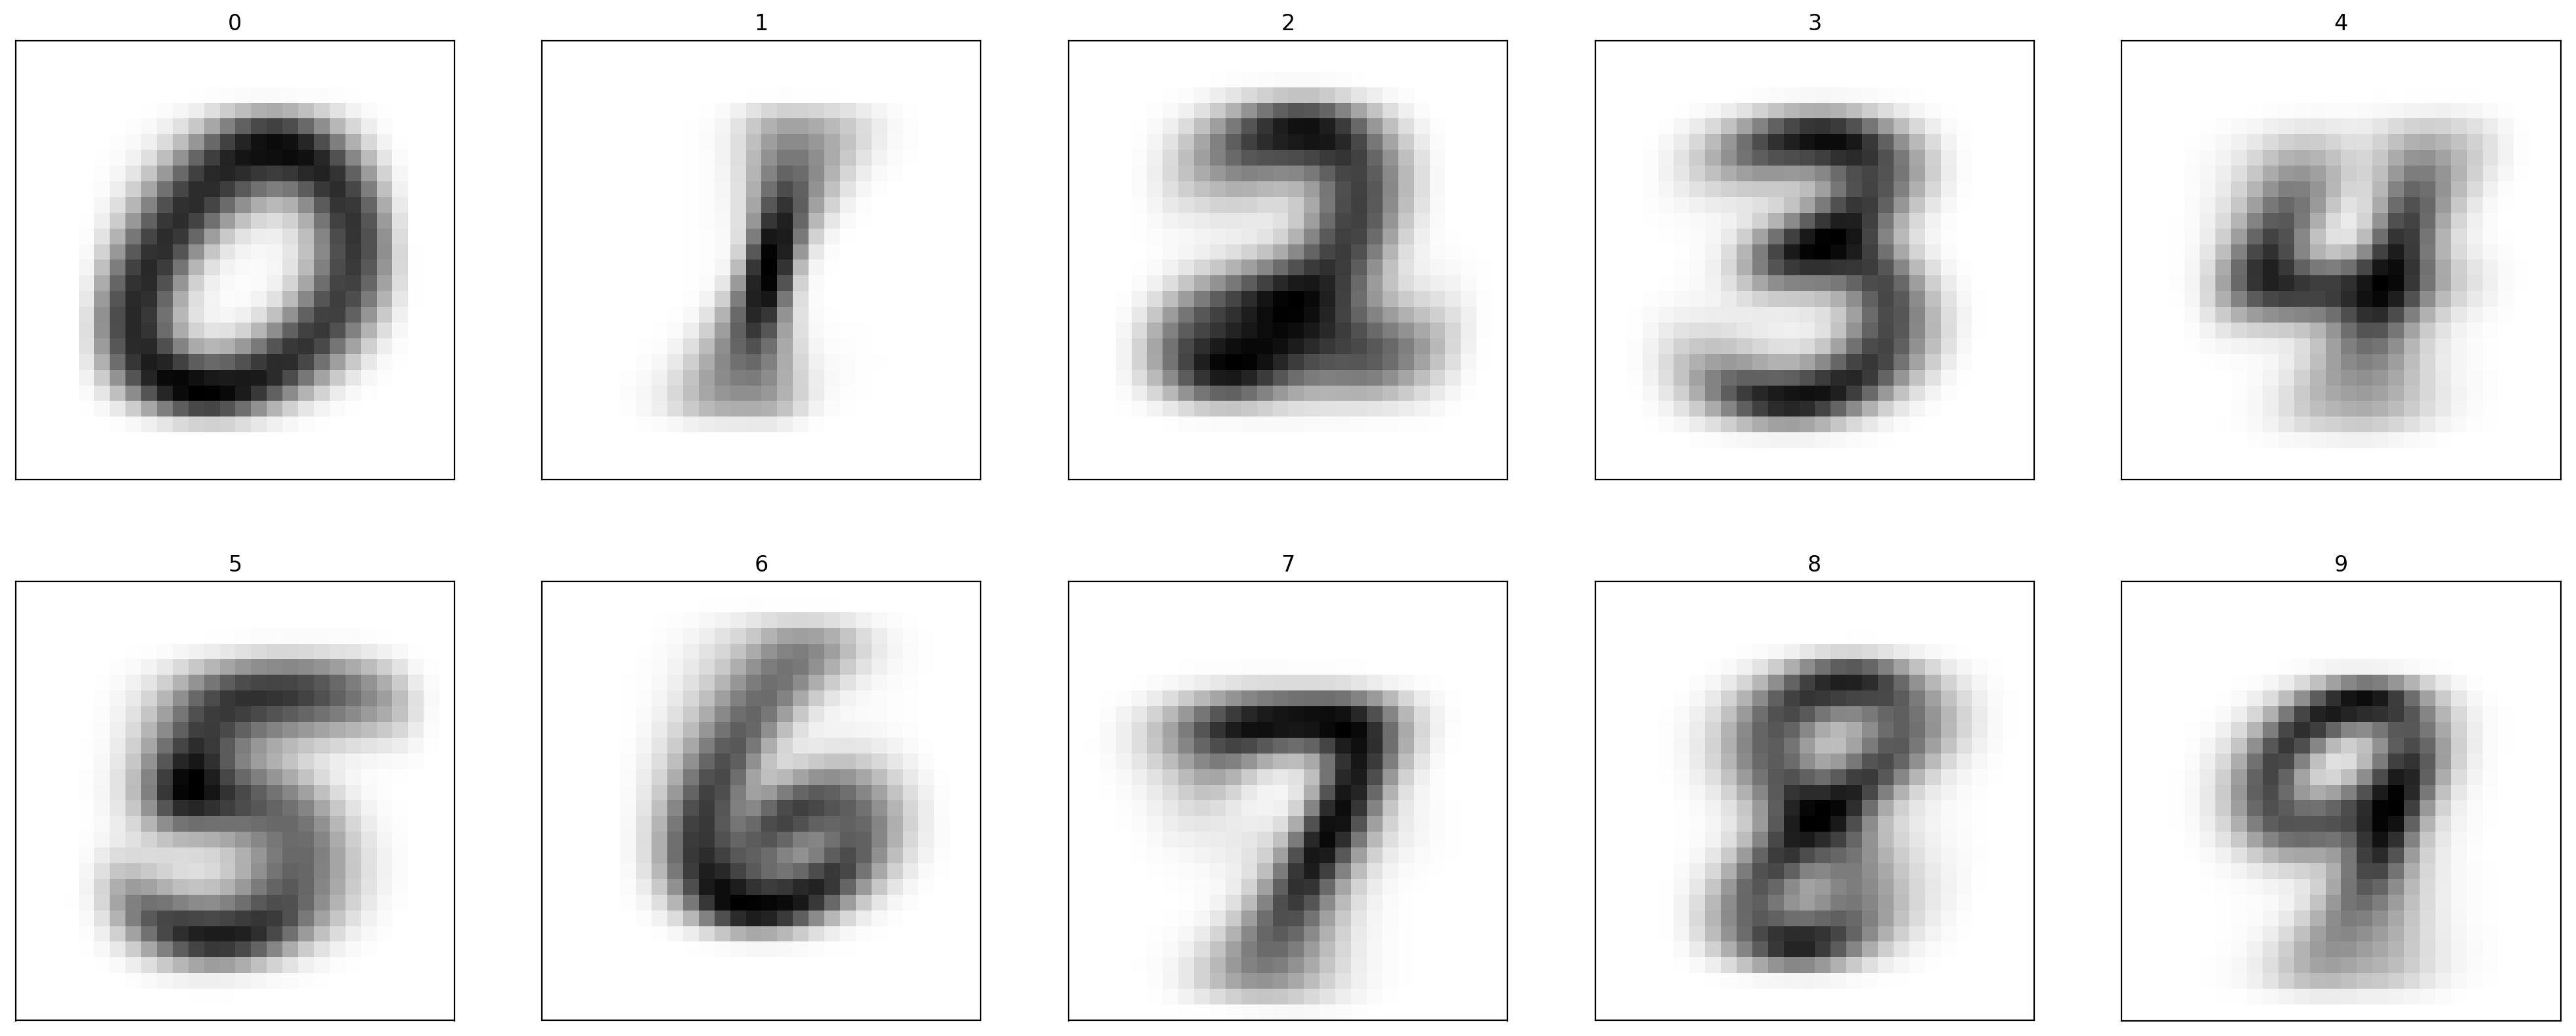

In [6]:
plt.figure(figsize=(25, 10), dpi=200)
for i in range(len(labels)):
    plt.subplot(2, len(labels) / 2, i + 1)
    imshow(mean_train_imgs[i, :], i)
plt.show()

Seus respectivos histogramas são dados a seguir.

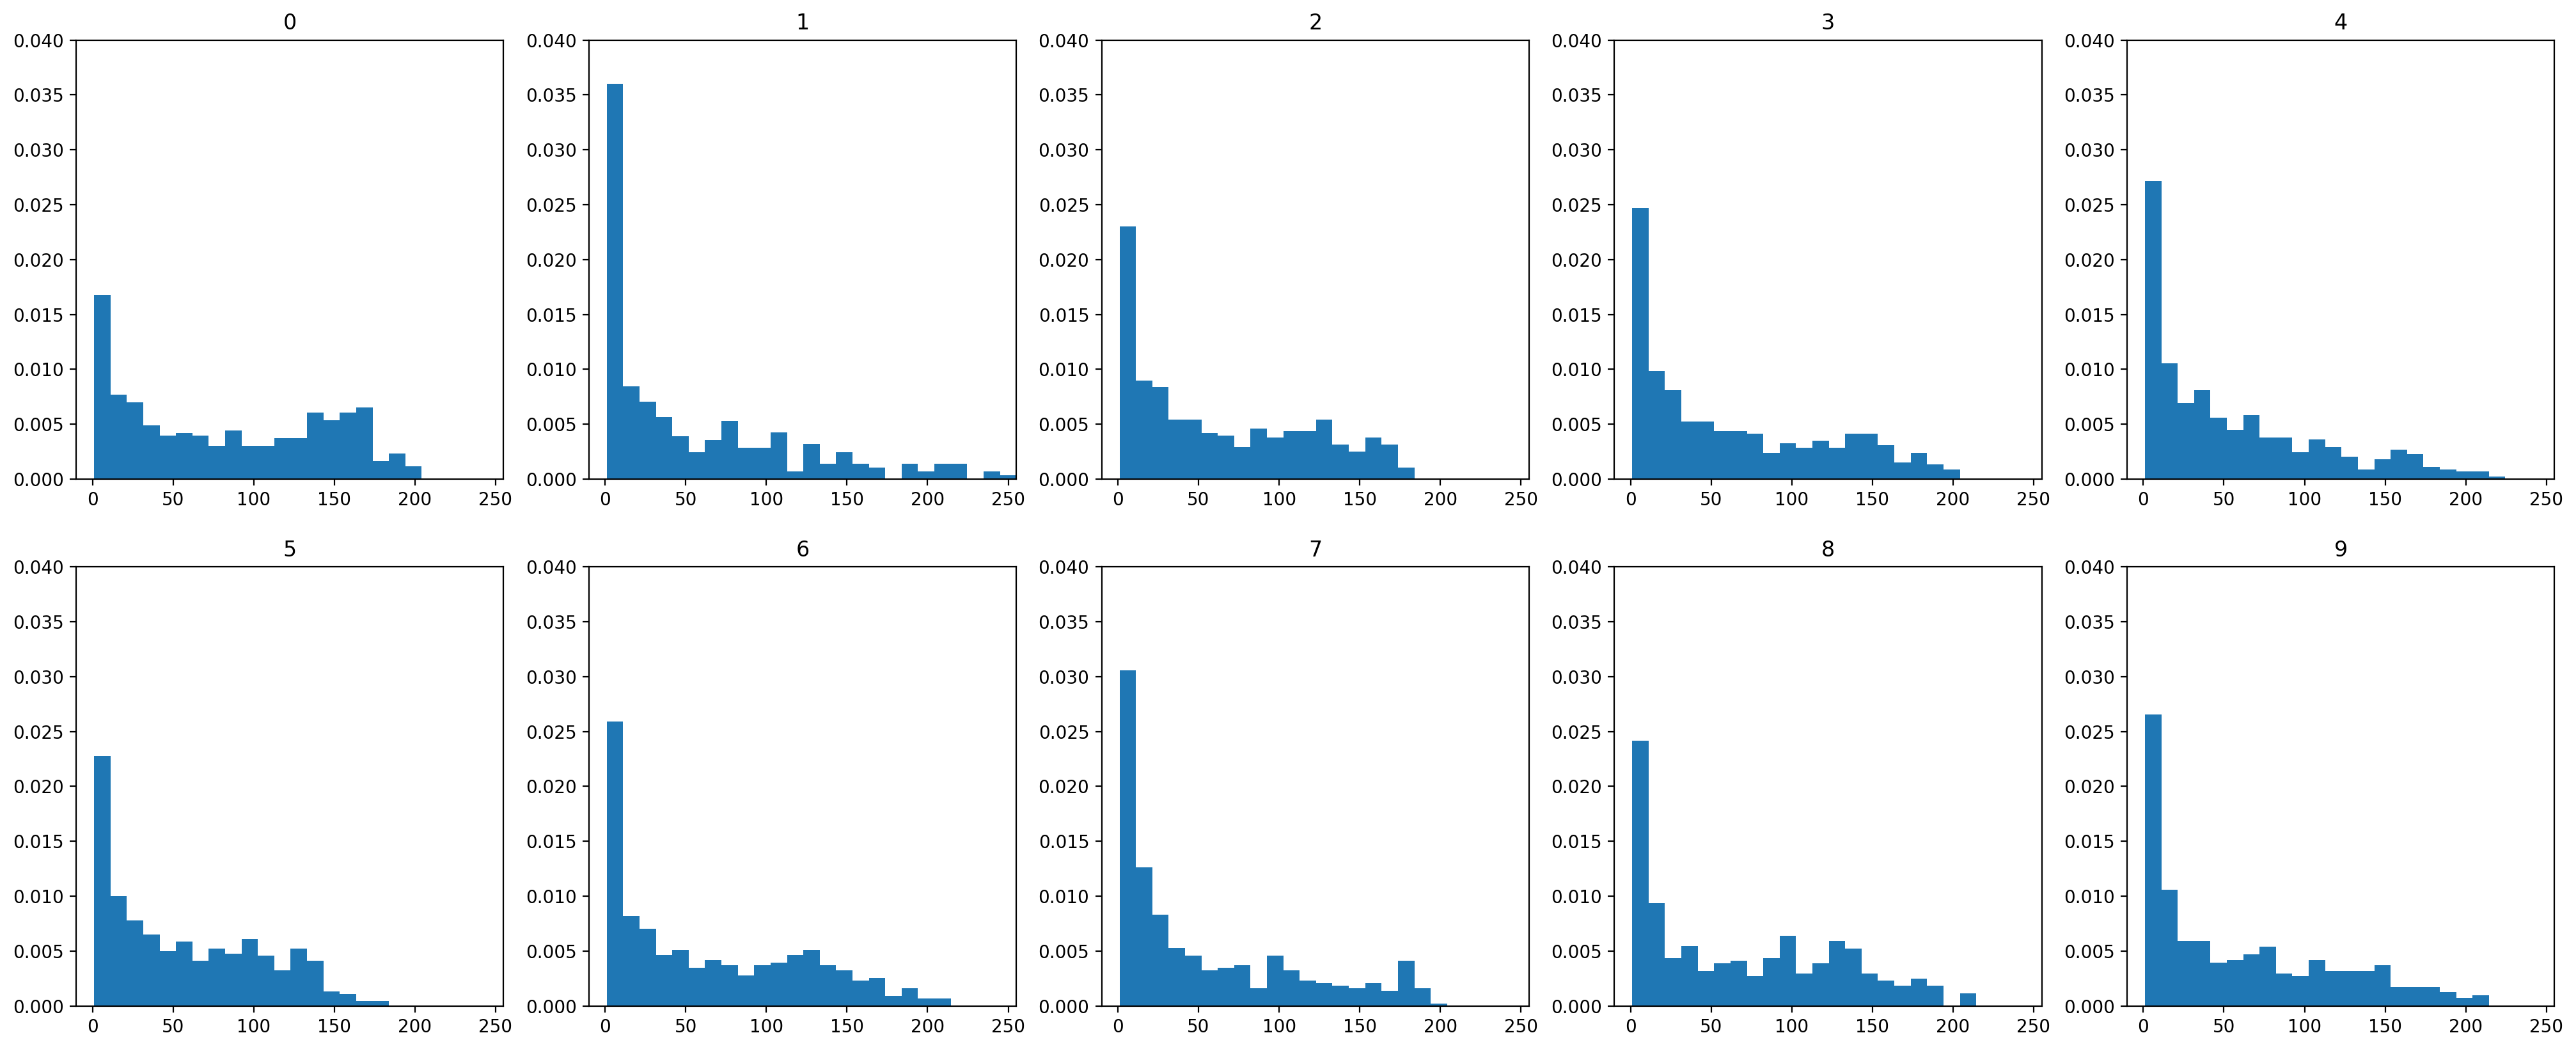

In [7]:
plt.figure(figsize=(25, 10), dpi=200)
for i in range(len(labels)):
    plt.subplot(2, len(labels) / 2, i + 1)
    plt.hist(mean_train_imgs[i, :], bins=25, range=(1, 255), density=True)
    plt.axis([-10, 255, 0, 0.04])
    plt.title(i)
plt.show()

Enfim, a comparação dois a dois das médias de cada rótulo.

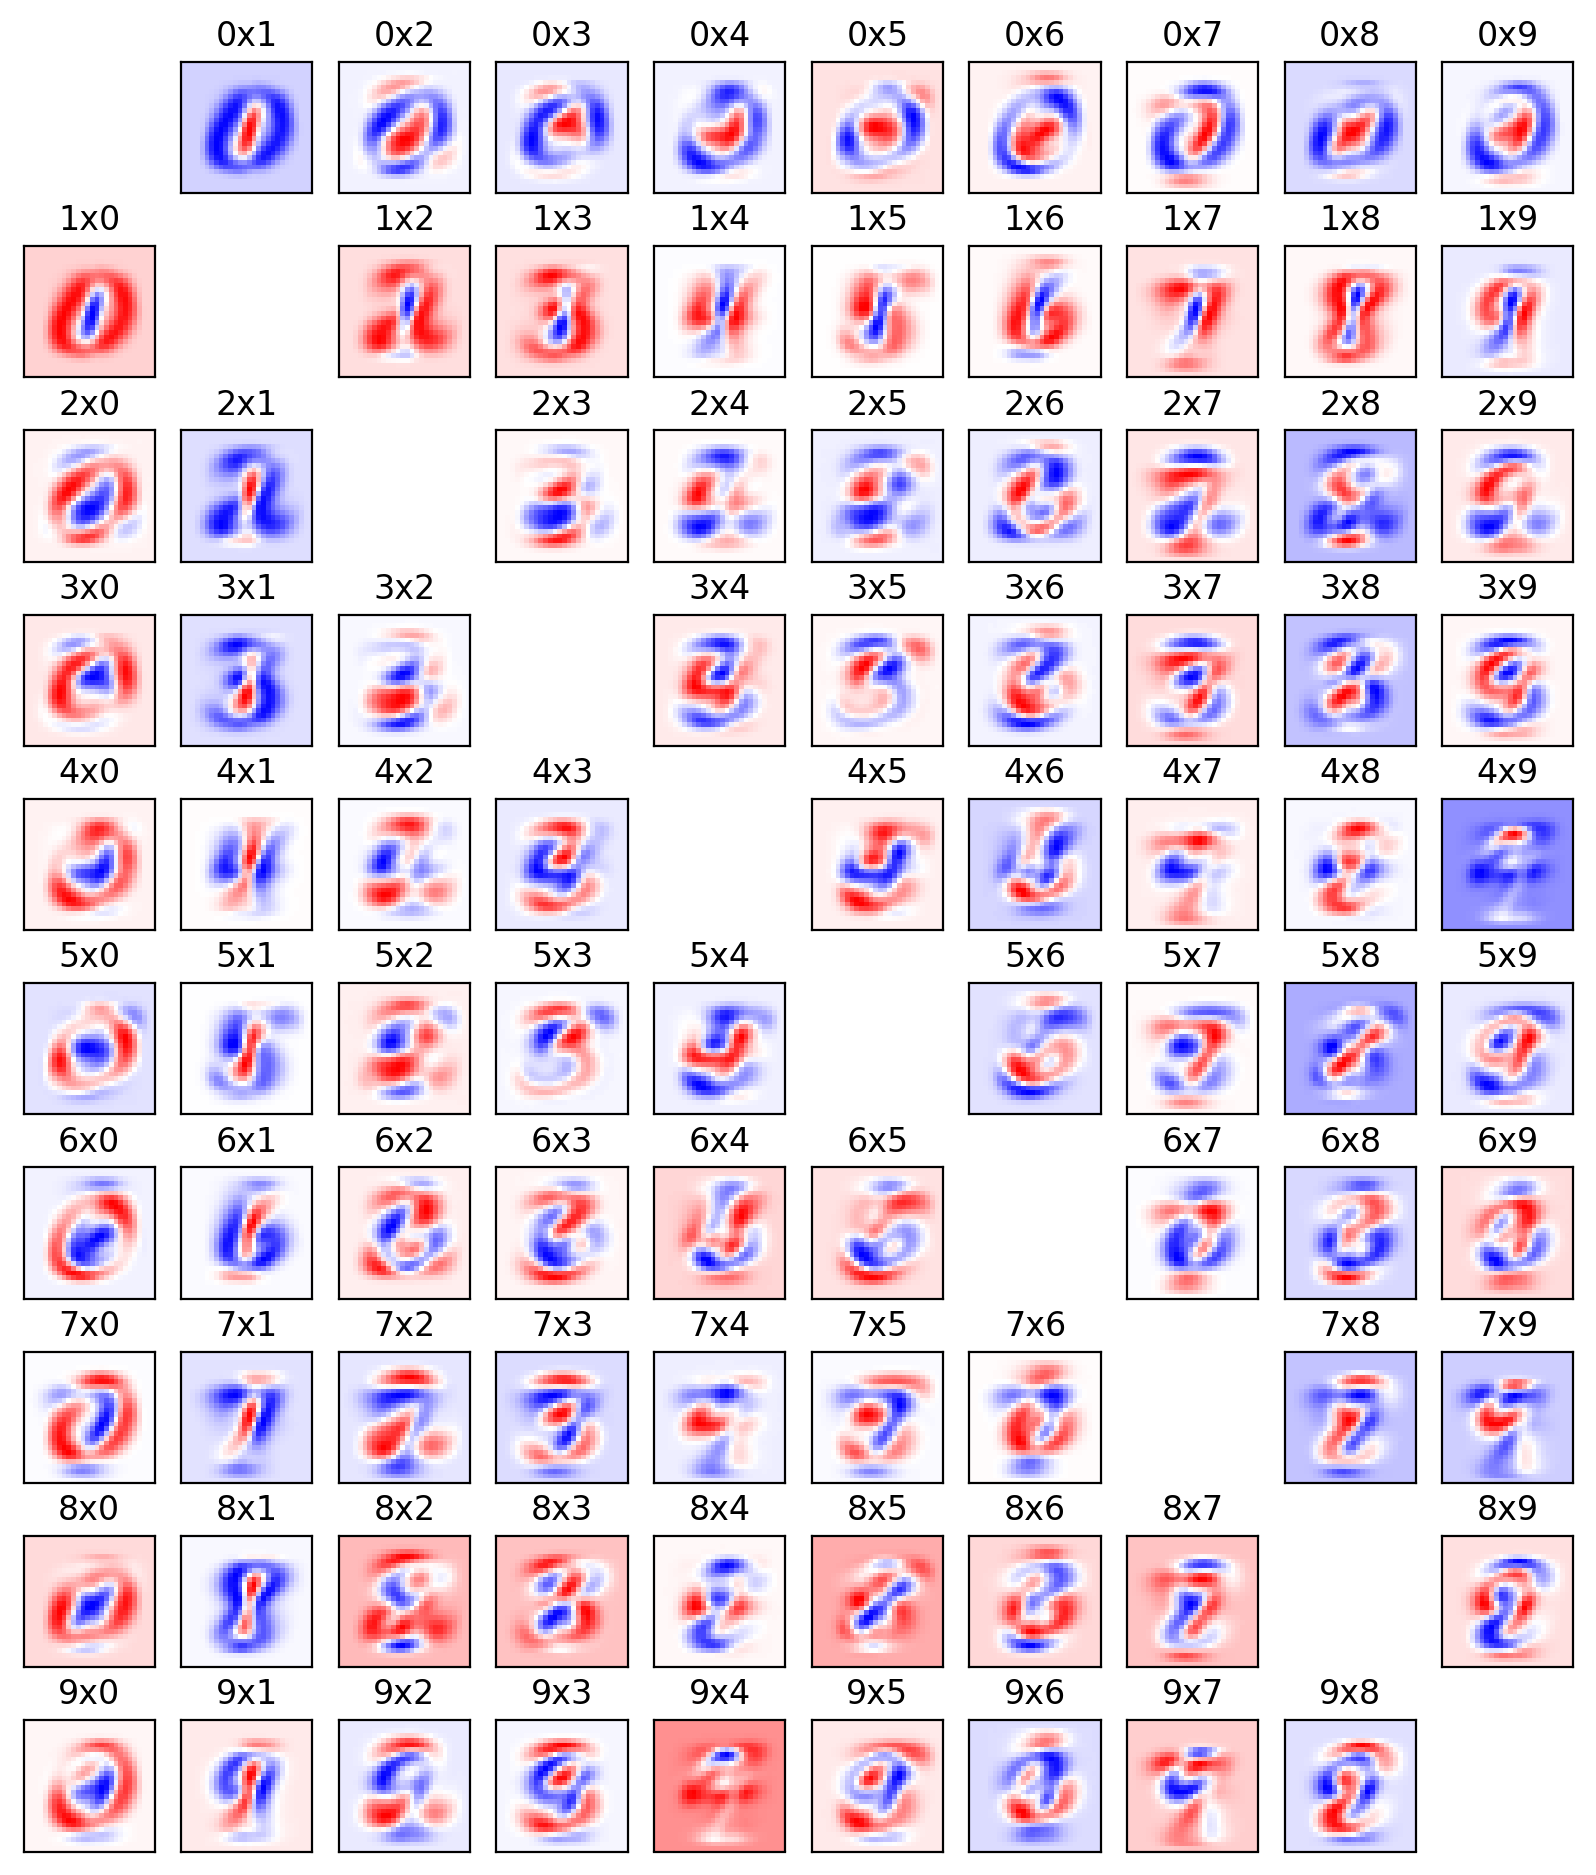

In [8]:
plt.figure(figsize=(10, 12), dpi=200)
for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j:
            plt.subplot(len(labels), len(labels), len(labels) * i + j + 1)
            image = mean_train_imgs[i, :] - mean_train_imgs[j, :]
            imshow(image, str(i) + 'x' + str(j), cmap='bwr')
plt.show()

---
## Redução de Dimensionalidade

A seguir, serão discutidos os efeitos provocados pela aplicação dos algoritmos PCA e LDA ao conjunto de dados MNIST.

### PCA

O PCA (do inglês, *Principal Component Analysis*), é um método de estatística multivariada muito utilizado para reduzir a dimensão do conjunto de dados mantendo a maior quantidade possível de informação nos dados transformados. O primeiro passo é obter uma matriz de covariância para dos dados, então supondo que temos um conjunto com $p$ variáveis temos:

$$
\Sigma =
\left[\begin{array}[cccc]
    \ Var(X_{1}) & Cov(X_{1},X_{2}) & \ldots & Cov(X_{1},X_{p}) \\
    Cov(X_{2},X_{1}) & Var(X_{2}) & \ldots & Cov(X_{2},X_{p}) \\
    \vdots & \vdots & \ddots & \vdots\\
    Cov(X_{n},X_{1}) & Cov(X_{p},X_{2}) & \ldots & Var(X_{p})
\end{array}\right]
$$

onde:

$$Cov(X_{i},X_{j})=\frac{\sum X_{i}X_{j}-\sum X_{i}\cdot \sum X_{j}}{p}.$$ 

Observe que como $Cov(X_{i},X_{j}) = Cov(X_{j},X_{i})$ a matriz $\Sigma$ é simétrica, logo:

$$ \Sigma = QDQ^{T}$$

sendo:

$$Q = [q_{1},q_{2},\cdots,q_{p}],$$

$$Q^{T} = 
\left[\begin{array}
    \ q_{1}^{T}\\
    q_{2}^{T}\\
    \vdots\\
    q_{p}^{T}\\
\end{array}\right]
$$

e

$$D = 
\left[\begin{array}
    \ \lambda_{1}&0&\cdots&0\\
    0&\lambda_{2}&\cdots&0\\
    \vdots&\vdots&\ddots&\vdots\\
    0&0&\cdots&\lambda_{p}\\
\end{array} \right]
$$

onde $q_{i}$ é o autovetor, da matriz de covariâncias, correspondente ao auto valor $\lambda_{i}$, $i=1,2,\cdots,p$. Podemos então reescrever $\Sigma=\lambda_{1}q_{1}q_{1}^{T}+\lambda_{2}q_{2}q_{2}^{T}+\cdots+\lambda_{p}q_{p}q_{p}^{T}$, obserque que $q_{i}q_{i}^{T}$ são sempre matrizes de posto 1, logo, se ordenarmos de maneira decrescente os autovalores teremos os autovetores de maior peso na formação de $\Sigma$. Definindo $\lambda_{(i)}$ como o i-ésimo maior autovetor e $q_{(i)}$ como seu autovalor correspondente, tal que $q_{i}\geq q_{j}, \forall i,j=1,\cdots,p$, a matriz de componentes será:

$$C_{p} = [q_{(1)},q_{(2)},\cdots,q_{(p)}].$$

Dada uma matriz de dados p-dimensionais, $\mathbf{X}_{n\times p}$, que desejamos reduzir para $k$ dimensões basta multiplicarmos pela matriz formada pelas $k$ primeiras colunas da matriz obtida anteriormente:

$$C_{k} = [q_{(1)},q_{(2)},\cdots,q_{(k)}],$$

$$T_{n\times k} = X_{n\times p}\cdot C_{p\times k}.$$

Para quantificar a qualidade da redução de dimensionalidade podemos utilizar a variabilidade explicada, ou seja, quanto da variabilidade original do conjunto de dados foi preservada no conjundo de dados transformado:

$$Variância\ Explicada_{k}=\frac{\sum_{i=1}^{k}\lambda_{(i)}}{\sum_{i=1}^{n}\lambda_{(i)}}.$$

In [11]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=10, svd_solver='auto')
pca = pca.fit(train_imgs)
print('Variância explicada pelo PCA: %.2f%%' % (100 * sum(pca.explained_variance_ratio_)))

Variância explicada pelo PCA: 48.81%


Para que ambos os dados de treinamento e de teste sejam transformados pelo PCA já treinado, são necessário executar os seguintes comandos.

In [12]:
train_imgs_pca = pca.transform(train_imgs)
test_imgs_pca = pca.transform(test_imgs)

Ilustrando os 2 principais componentes providos pelo PCA, temos:

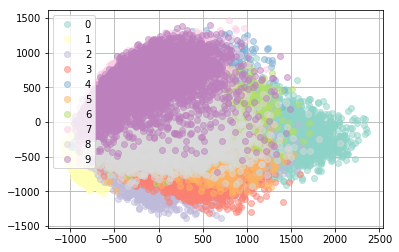

In [13]:
fig = plt.figure()
for i in range(len(labels)):
    i_train_imgs_pca = train_imgs_pca[train_lbls == i, :]
    plt.plot(i_train_imgs_pca[:, 0], i_train_imgs_pca[:, 1], marker='o', linestyle='', color=plt.cm.Set3.colors[i], alpha=0.5)
plt.legend(labels, loc='upper left')
plt.grid(True)
plt.show()

Aplicando o PCA nas imagens médias de cada rótulo, ao considerar apenas os seus dois componentes principais pode-se compará-los vetorialmente, conforme visto na figura seguinte.

<IPython.core.display.Javascript object>


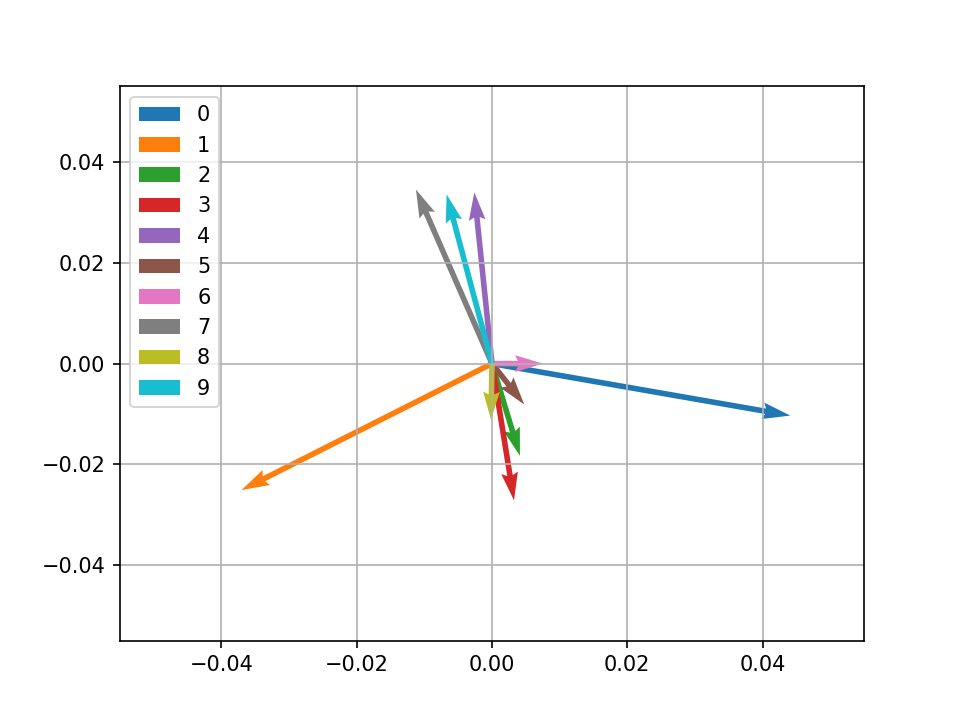

In [14]:
mean_train_imgs_pca = pca.transform(mean_train_imgs)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

origin = [0, 0]
X, Y = zip(origin)
fig = plt.figure()
for i in range(len(labels)):
    U = (mean_train_imgs_pca[i, 0],)
    V = (mean_train_imgs_pca[i, 1],)
    plt.quiver(X, Y, U, V, color=plt.cm.tab10.colors[i], scale=2500)
plt.legend(labels, loc='upper left')
plt.grid(True)
plt.show()

Verifica-se que os dois componentes principais separam bem apenas as imagens que representam o algarismo 1. Os demais algarismos possuem certa similaridade.

Semelhantemente, as três componentes principais providas pelo PCA podem ser visualizadas a seguir.

<IPython.core.display.Javascript object>


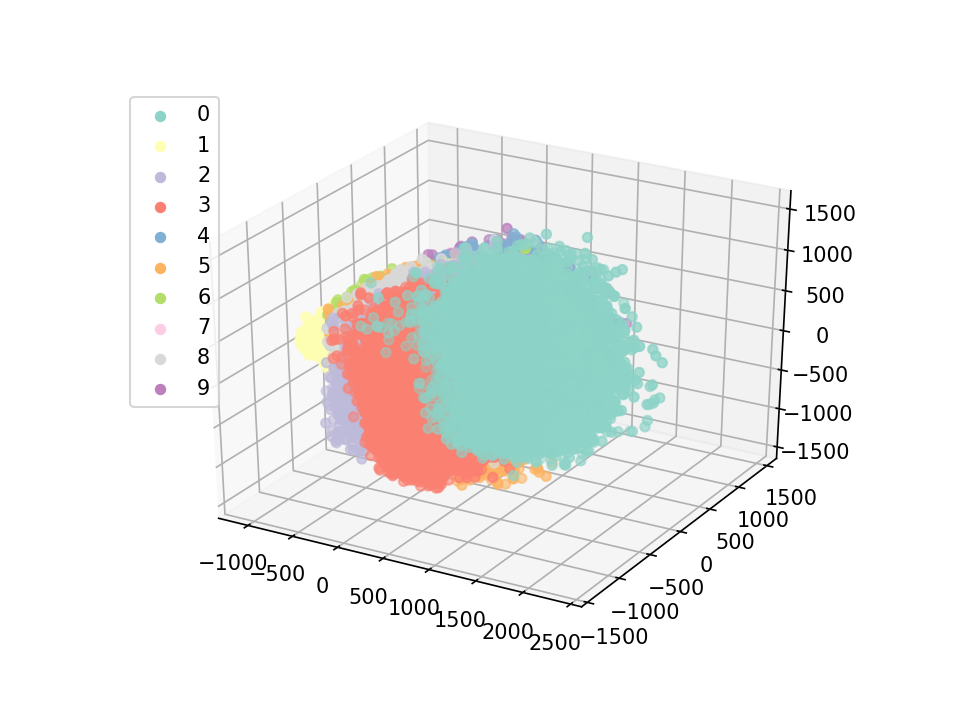

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(labels)):
    i_train_imgs_pca = train_imgs_pca[train_lbls == i, :]
    ax.scatter(i_train_imgs_pca[:, 0], i_train_imgs_pca[:, 1], i_train_imgs_pca[:, 2], marker='o', c=plt.cm.Set3.colors[i])
plt.legend(labels, loc='upper left')
plt.show()

Comparando, agora, as imagens médias com os 3 componentes principais, tem-se:

<IPython.core.display.Javascript object>


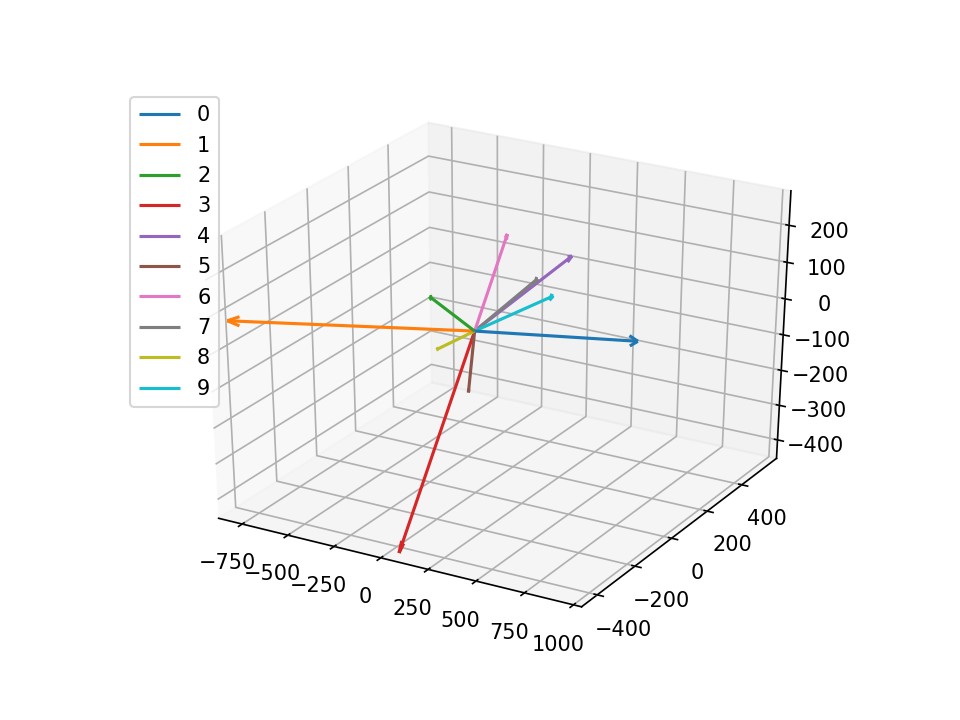

In [16]:
origin = [0, 0, 0]
X, Y, Z = zip(origin)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(labels)):
    U = (mean_train_imgs_pca[i, 0],)
    V = (mean_train_imgs_pca[i, 1],)
    W = (mean_train_imgs_pca[i, 2],)
    ax.quiver(X, Y, Z, U, V, W, color=plt.cm.tab10.colors[i], arrow_length_ratio=0.05)
ax.set_xlim([min(mean_train_imgs_pca[:, 0]), max(mean_train_imgs_pca[:, 0])])
ax.set_ylim([min(mean_train_imgs_pca[:, 1]), max(mean_train_imgs_pca[:, 1])])
ax.set_zlim([min(mean_train_imgs_pca[:, 2]), max(mean_train_imgs_pca[:, 2])])
plt.legend(labels, loc='upper left')
plt.show()

Através desta comparação vetorial, verifica-se que há uma separação bem melhor quando se considera as três principais componentes ao invés de apenas duas.

### LDA

O LDA (acrônimo para *Linear Discriminant Analysis*) obtém a matriz de projeção $\mathbf{W}_{lda}$ que maximiza a separação entre as classes e minimiza a variabilidade dentro de cada classe. A matriz intra-classe, que quantifica a variabilidade dentro de cada classe, é  definida como:

$$S_{w}=\displaystyle\sum_{i=1}^{g}(N_{i}-1)S_{i}=\displaystyle\sum_{i=1}^{g}\sum_{j=1}^{N_{i}}(x_{i,j}-\bar{x}_{i})(x_{i,j}-\bar{x}_{i})^{T}$$

onde, $x_{i,j}$ é a j-ésima observação n-dimensional da i-ésima classe, $N_{i}$ o número de observações da i-ésima classe e $g$ a quantidade total de classes. É importante ressaltar que $\bar{X_{i}}$ e $S_{i}$ são estimadores não viciados para as médias e as matrizes de covariância.

A matriz inter-classe, que quantifica a separação entre as classes, é definida como:

$$S_{b}=\displaystyle\sum_{i=1}^{g} N_{i}(\bar{x}_{i}-\bar{x})(\bar{x}_{i}-\bar{x})^{T}.$$

O objetivo da LDA é encontrar a matriz $\mathbf{W}_{lda}$ que maximiza a razão entre os determinantes das matrizes inter-classe e intra-classe:

$$W_{lda}=\displaystyle{\underset{W}{\operatorname{arg\,max}}}\frac{\left|W^{T}S_{b}W\right|}{\left|W^{T}S_{w}W\right|}.$$

O critério de Fisher descrito acima é maximizado quando a matrix de projeção $W_{lda}$ é composta pelos autovetores de $S_{w}^{-1}S_{b}$.

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=8)
ldafit = lda.fit(train_imgs, train_lbls)
print('Variância explicada pelo LDA: %.2f%%' % (100 * sum(ldafit.explained_variance_ratio_)))

/home/adrianohrl/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Variância explicada pelo LDA: 97.32%


/home/adrianohrl/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Para que ambos os dados de treinamento e de teste sejam transformados pelo LDA já treinado, são necessário executar os seguintes comandos.

In [31]:
train_imgs_lda = ldafit.transform(train_imgs)
test_imgs_lda = ldafit.transform(test_imgs)

Ilustrando os 2 principais componentes providos pelo LDA, temos:

<IPython.core.display.Javascript object>


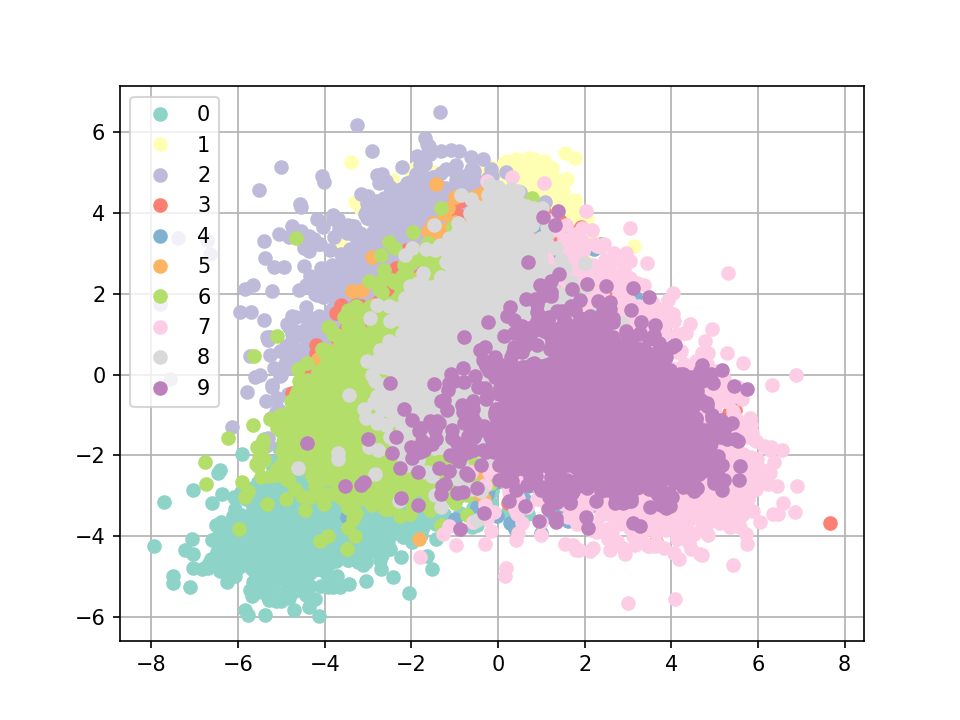

In [143]:
fig = plt.figure()
for i in range(len(labels)): 
    i_train_imgs_lda = train_imgs_lda[train_lbls == i, :]
    plt.plot(i_train_imgs_lda[:, 0], i_train_imgs_lda[:, 1], marker='o', linestyle='', color=plt.cm.Set3.colors[i])
plt.legend(labels, loc='upper left')
plt.grid(True)

Aplicando o LDA nas imagens médias de cada rótulo, ao considerar apenas os seus dois componentes principais pode-se compará-los vetorialmente, conforme visto na figura seguinte.

<IPython.core.display.Javascript object>


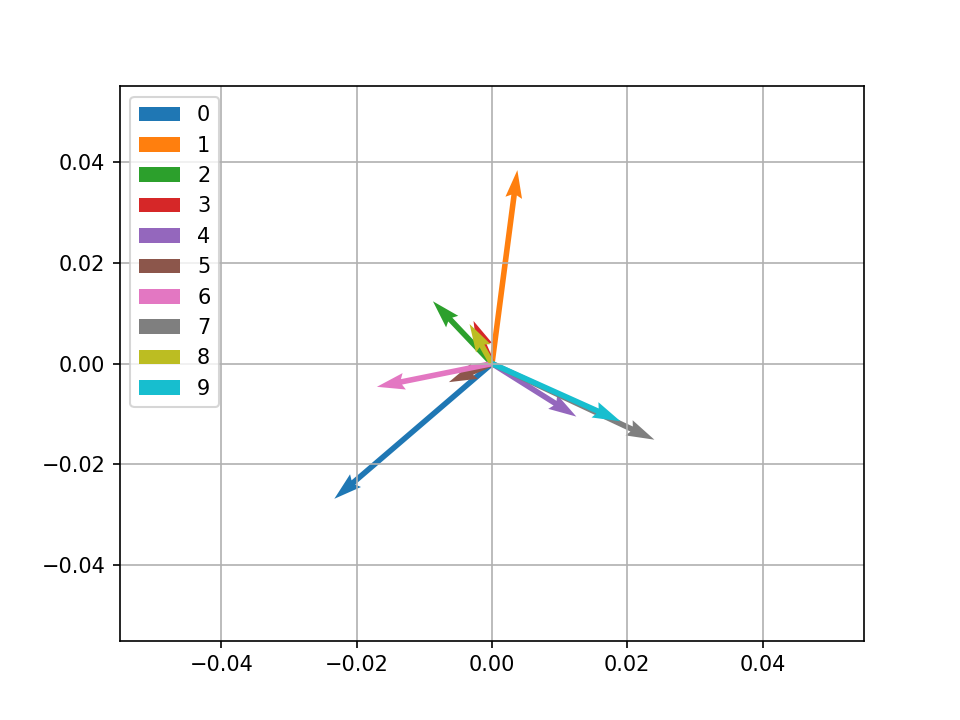

In [154]:
mean_train_imgs_lda = ldafit.transform(mean_train_imgs)

origin = [0, 0]
X, Y = zip(origin)
fig = plt.figure()
for i in range(len(labels)):
    U = (mean_train_imgs_lda[i, 0],)
    V = (mean_train_imgs_lda[i, 1],)
    plt.quiver(X, Y, U, V, color=plt.cm.tab10.colors[i], scale=15)
plt.legend(labels, loc='upper left')
plt.grid(True)
plt.show()

Verifica-se que os dois componentes principais orindos do LDA separam bem apenas as imagens que representam o algarismo 1 também. Os demais algarismos possuem certa similaridade.

Semelhantemente, as três componentes principais providas pelo LDA podem ser visualizadas a seguir.

<IPython.core.display.Javascript object>


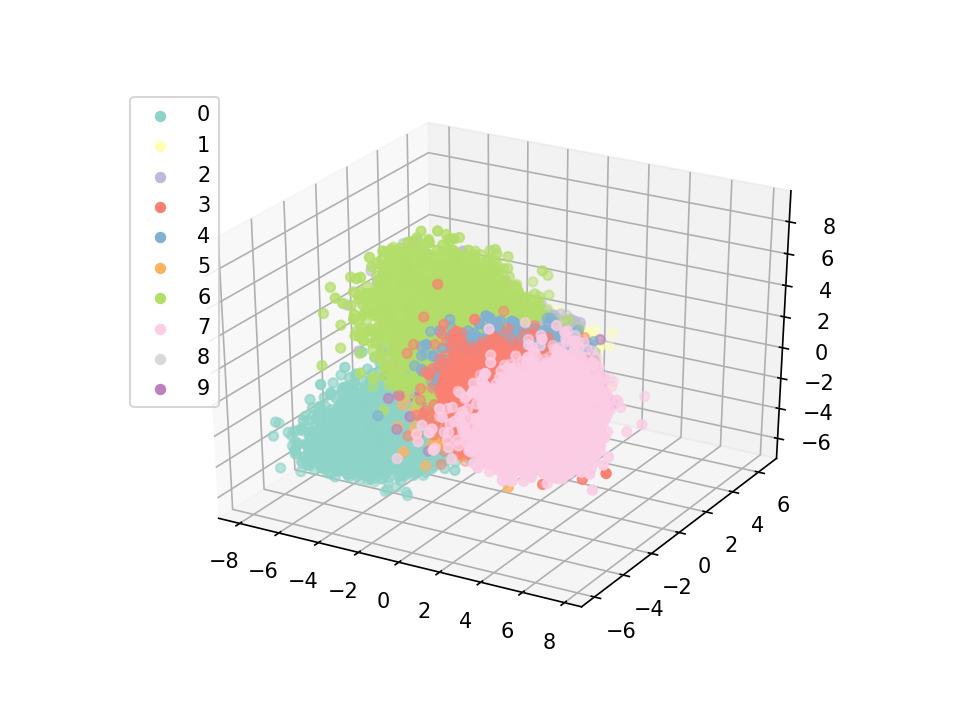

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(labels)):
    i_train_imgs_lda = train_imgs_lda[train_lbls == i, :]
    ax.scatter(i_train_imgs_lda[:, 0], i_train_imgs_lda[:, 1], i_train_imgs_lda[:, 2], marker='o', c=plt.cm.Set3.colors[i])
plt.legend(labels, loc='upper left')
plt.show()

Verifica-se uma melhor separação dos dados ao utilizar as três componentes principais do LDA do que quando com o PCA. E isso é reforçado quando comparamos as imagens médias de cada rótulo veritorialmente, conforme mostra a figura a seguir.

<IPython.core.display.Javascript object>


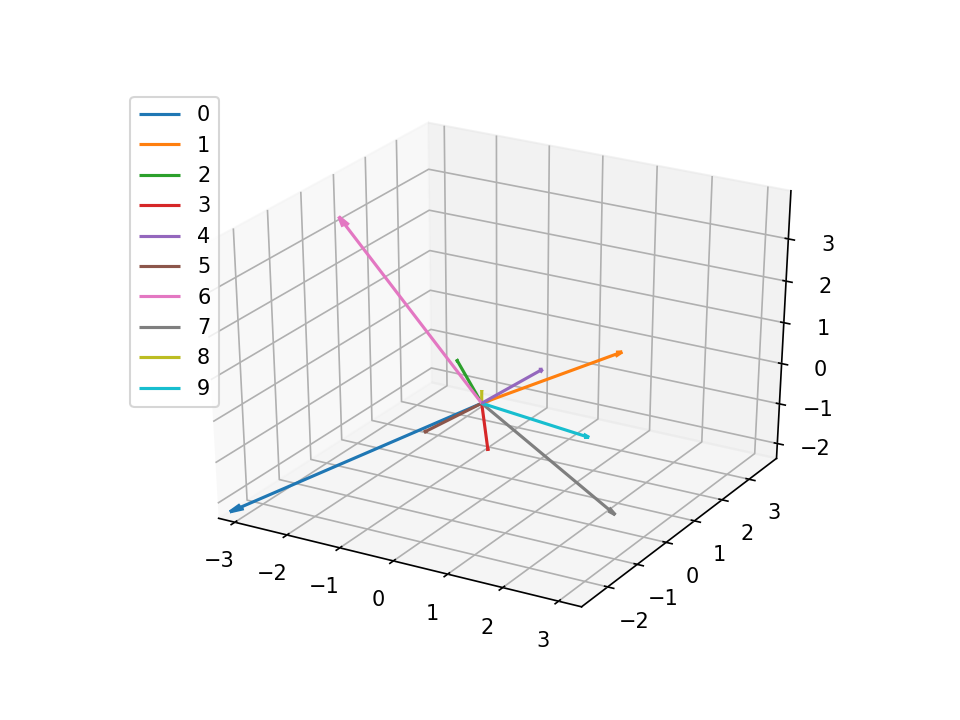

In [187]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(labels)):
    U = (mean_train_imgs_lda[i, 0],)
    V = (mean_train_imgs_lda[i, 1],)
    W = (mean_train_imgs_lda[i, 2],)
    ax.quiver(X, Y, Z, U, V, W, color=plt.cm.tab10.colors[i], arrow_length_ratio=0.05)
ax.set_xlim([min(mean_train_imgs_lda[:, 0]), max(mean_train_imgs_lda[:, 0])])
ax.set_ylim([min(mean_train_imgs_lda[:, 1]), max(mean_train_imgs_lda[:, 1])])
ax.set_zlim([min(mean_train_imgs_lda[:, 2]), max(mean_train_imgs_lda[:, 2])])
plt.legend(labels, loc='upper left')
plt.show()

---
## Modelagem

Neste momento, deseja-se criar modelos que possam ser utilizados para que, dada uma imagem, este modelo possa classificá-la em um dos rótulos treinados. 

Para isso, foram utilizados dois métodos supervisionados: *Árvore de Decisão* e *Random Forest*, os quais serão explanados a frente.

### Árvore de Decisão

Árvores de decisão são modelos estatísticos que utilizam um treinamento supervisionado para a classificação e previsão de dados. Assim, este classificador necessita do conjunto de entrada e das suas respectivas saídas.

Estes modelos utilizam a estratégia de dividir para conquistar, isto é, um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema. 

Na árvore de decisão onde cada nó de decisão contém um teste para algum atributo, cada ramo descendente corresponde a um possível valor deste atributo, o conjunto de ramos são distintos, cada folha está associada a uma classe e, cada percurso da árvore, da raiz à folha corresponde uma regra de classificação. 

Árvores de decisão podem criar árvores viesadas se o grupo de treino não estiver balanceado. Podemos verificar isso através de um histograma dos rótulos do conjunto de treino.

<IPython.core.display.Javascript object>


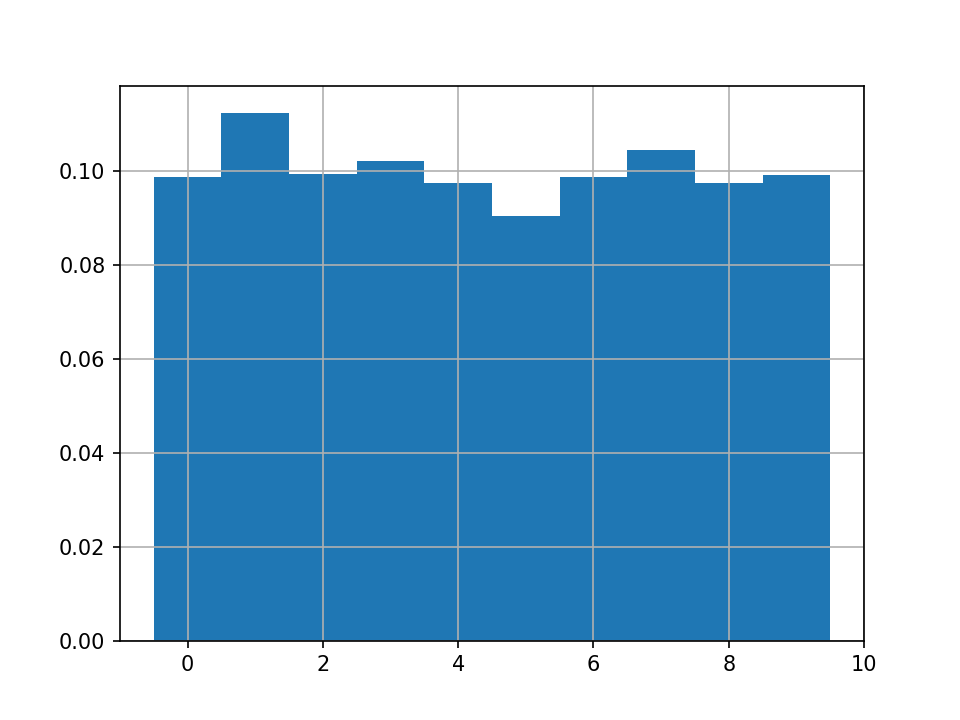

In [186]:
fig = plt.figure()
plt.hist(train_lbls, density=True, bins=range(11), align='left')
plt.grid(True)
plt.show()

Logo, o método Árvore de Decisão pode ser aplicado a este conjunto de dados de treinamento, pois este se encontra balanceado.

A biblioteca *sklearn* do *Python* disponibiliza o classificador de Árvore de Decisão. Para utilizar este método, são necessários as seguintes importações:

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

A seguir, é mostrado como se dá a utilização desta biblioteca. Para se utilizar o classificador Árvore de Decisão do *sklearn* corretamente, faz-se necessário executar duas etapas: (1) a instanciação do classificador conforme o critério desejado e (2) o treinamento do classificador. Após estas duas etapas, a árvore de decisão treinada está pronta para classificar.

Contudo, a fim de validar o modelo gerado, o conjunto de teste é classificado pelo modelo. Após esta etapa de predição, os respectivos rótulos do conjunto de teste são comparados com o resultado predito. A partir desta comparação, pode-se verificar a eficácia do modelo classificador a partir de uma matriz de confusão. Cada linha da matriz de confusão aponta para o rótulo real enquanto cada uma de suas colunas aponta para o rótulo predito.

Assim, o classificador Árvore de Decisão será aplicado à base de dados MNIST em formas diferentes.

Primeiramente, foi utilizado o classificador com o seu critério padrão, o de Gini. Assim que o classificador é instanciado, o conjunto de treinamento do MNIST de imagens com seus respectivos rótulos são utilizados para treiná-lo. Em seguida, o conjunto de dados de treinamento do MNIST são preditos pelo modelo treinado. E, então, a matriz de confusão é gerada.

In [189]:
tree = DecisionTreeClassifier()
treefit = tree.fit(train_imgs, train_lbls)
treepred = treefit.predict(test_imgs)
print(confusion_matrix(test_lbls, treepred))

[[ 912    0   10    5    6   12   11    4   10   10]
 [   0 1093   10    2    1    4    7    2   13    3]
 [   9   13  876   40   13   11    8   31   21   10]
 [   9    6   28  864    6   42    5   11   20   19]
 [   8    2   12    9  859    8   16   10   16   42]
 [  15    7    5   44    9  749   19    7   23   14]
 [  16    4   13    7   23   19  845    1   26    4]
 [   4   11   21   16    8    7    3  923    9   26]
 [  15    6   24   41   24   28   15    9  789   23]
 [  14    5    6   19   34   11    7   24   22  867]]


Analisando esta matriz de confução, verifica-se que:

In [194]:
print('Acurácia: %.2f%%' % (100 * treefit.score(test_imgs, test_lbls)))

Score: 87.77%


Desta vez, o conjunto de treinamento do MNIST com seus respectivos rótulos são utilizados para treinar um classificador Árvore de Decisão com o critério de entropia. A partir do resultado da predição dos dados de teste do MNIST pelo novo classificador treinado, foi gerada uma nova matriz de confusão.

In [196]:
tree = DecisionTreeClassifier(criterion='entropy')
treefit= tree.fit(train_imgs, train_lbls)
treepred = treefit.predict(test_imgs)
print(confusion_matrix(test_lbls, treepred))

[[ 910    2    9    3    3   17   11    6    9   10]
 [   0 1098    4    6    0    9    6    3    7    2]
 [   9    5  904   18   12   12   19   22   28    3]
 [  14    8   21  854    3   48    5   16   20   21]
 [  11    2   15    5  861   11   13    7   16   41]
 [  13    4    7   34    4  761   22    3   25   19]
 [  15    5   12    7   17   17  869    4   10    2]
 [   2   10   29   15   12    8    0  926    8   18]
 [   7    9   15   35   19   23   17   12  810   27]
 [   4    8    8   16   37   22    2   16   27  869]]


In [195]:
print('Acurácia: %.2f%%' % (100 * treefit.score(test_imgs, test_lbls)))

Score: 87.77%


Neste momento, utilizou-se um modelo Árvore de Decisão para classificar imagens da base MNIST a partir dos dados transformados pelo algoritmo PCA. Foi utilizado o critério de entropia para instanciar o classificador. Com as predições, foi gerada a seguinte árvore de confusão.

In [197]:
tree = DecisionTreeClassifier(criterion='entropy')# critério Entropia
treefit_pca= tree.fit(train_imgs_pca, train_lbls)
treepred_pca = treefit_pca.predict(test_imgs_pca)# prevendo valores do grupo teste
print(confusion_matrix(test_lbls, treepred_pca))# contruindo matrix de confusão i= Real j= Predito

[[ 852    1   20    9    4   46   29    3    7    9]
 [   0 1102    4    5    5    0    5    4    7    3]
 [  12    9  889   33   13   13   17   14   27    5]
 [  12    9   14  820    3   56    5   10   65   16]
 [   1    2   10    3  782   12   18   20   13  121]
 [  28    4    6   52   10  701   13    3   50   25]
 [  24    1   21    3   16   15  861    1   10    6]
 [   1   15   31   10   18    5    2  874   11   61]
 [  13    0   32   83   14   44    9   18  729   32]
 [   3    7    5   20  115   30    7   43   26  753]]


Analisando esta matriz de confução, verifica-se que:

In [198]:
print('Acurácia: %.2f%% (com PCA)' % (100 * treefit_pca.score(test_imgs_pca, test_lbls)))

Acurácia: 83.63% (com PCA)


Verifica-se que houve uma redução na acurácia do classificador ao considerar apenas os componentes principais.

Desta vez, um classificador Árvore de Decisão utilizando o critério de entropia foi treinado com os dados de treinamento do MNIST transformados pelo algoritmo LDA. Ao utilizar o conjunto de teste do MNIST também transformado pelo LDA, pode-se compara os rótulos reais com os preditos, obtendo a seguinte matriz de confusão.

In [202]:
tree = DecisionTreeClassifier(criterion='entropy')
treefit_lda= tree.fit(train_imgs_lda, train_lbls)
treepred_lda = treefit_lda.predict(test_imgs_lda)
print(confusion_matrix(test_lbls, treepred_lda))

[[ 921    0    9    4    4   19   15    3    3    2]
 [   0 1066    9    9    2    4    2    4   36    3]
 [  12   13  875   36   16   11   18   16   34    1]
 [   3    5   26  841    5   59    4   18   36   13]
 [   1    4    8    3  867    2   13    8   15   61]
 [  12    7    6   65   12  670   16   13   79   12]
 [  19    3   21    2   17   18  867    0   11    0]
 [   2   14   22   24    6    6    1  895    6   52]
 [   8   22   19   33   17   61   17   13  755   29]
 [   6    5    7   10   84   16    0   61   18  802]]


Analisando esta matriz de confução, verifica-se que:

In [203]:
print('Acurácia: %.2f%% (com LDA)' % (100 * treefit_lda.score(test_imgs_lda, test_lbls)))

Acurácia: 85.59% (com LDA)


Verifica-se que houve uma redução na acurácia do classificador ao considerar apenas os componentes principais. Entretanto, a acurácia quando utilizando o LDA foisuperior do que quando utilizando o PCA.

### *Random Forest*

O método *Random Forest* é um algoritmo supervisionado de aprendizado. Este algorítmo cria um conjunto de Árvores de Decisão e combina seus resultados para aumentar sua acurácia.

A biblioteca *sklearn* do *Python* disponibiliza o classificador de *Random Forest*. Para utilizar este método, é necessária a seguinte importação:

In [19]:
from sklearn.ensemble import RandomForestClassifier

Semelhantemente à Árvore de Decisão, para se utilizar um classificador *Random Forest* é necessário instanciar um classificador escolhendo o critério desejado e, em seguida, faz-se necessário treinar o modelo classificador com um conjunto de entradas e suas respectivas saídas.

A eficácia do modelo pode ser obtida a partir da comparação entre os valores reais do conjunto de teste com os valores preditos a partir do classificador.

Logo, este classificador foi utilizado diversas vezes em configurações distintas para se especializar no problema da base MNIST.

Primeiramente, este classificador foi utilizado com o conjunto de treino do MNIST com seus respectivos rótulos. A partir do modelo treinado, o conjunto de teste foi predito por ele e, então, o seu resultado de predição foi comparado em uma matriz de confusão com os rótulos reais.

In [22]:
forest = RandomForestClassifier()
forestfit = forest.fit(train_imgs, train_lbls)
forestpred = forestfit.predict(test_imgs)
print(confusion_matrix(test_lbls, forestpred))

[[ 966    1    0    2    0    2    6    0    3    0]
 [   0 1121    3    3    0    1    2    0    4    1]
 [  10    3  983    8    4    1    3    8   11    1]
 [   4    0   20  947    1   18    1   10    9    0]
 [   1    0    3    0  938    1    5    2    6   26]
 [   9    3    5   24    5  823   10    2    7    4]
 [   8    4    6    2    6   12  915    0    5    0]
 [   2    4   26    5    2    0    0  974    5   10]
 [   9    3   11   19    9   10    3    6  892   12]
 [   4    6    9    8   23    5    2   11    9  932]]


Analisando esta matriz de confução, verifica-se que:

In [23]:
print('Acurácia: %.2f%%' % (100 * forestfit.score(test_imgs, test_lbls)))

Acurácia: 94.91%


Nota-se que a acurácia do classificador *Random Forest* é superior à acurácia do classificador Árvore de Decisão para o problema MNIST.

Semelhantemente, a mesma configuração foi realizada com a exceção de que o critério escolhido para a geração do modelo foi a entropia.

In [24]:
forest = RandomForestClassifier(criterion='entropy')
forestfit = forest.fit(train_imgs, train_lbls)
forestpred = forestfit.predict(test_imgs)
print(confusion_matrix(test_lbls, forestpred))

[[ 971    0    1    1    0    3    0    1    3    0]
 [   0 1121    4    4    0    1    4    0    1    0]
 [  11    3  978    7    1    1    8   11   10    2]
 [   1    1   15  940    2   22    2   11   13    3]
 [   6    0    5    4  920    0    5    2    9   31]
 [   6    6    3   32    1  822    9    2    7    4]
 [  11    2    4    0    8    7  919    0    6    1]
 [   1    8   17    2    5    0    0  979    3   13]
 [   7    1   10   22    7   17   11    2  893    4]
 [   9    7    3   15   26    7    1   11    7  923]]


Analisando esta matriz de confução, verifica-se que:

In [25]:
print('Acurácia: %.2f%%' % (100 * forestfit.score(test_imgs, test_lbls)))

Acurácia: 94.66%


Houve uma pequena redução na acurácia do classificador *Random Forest* nesta configuração.

Novamente, o classificador *Random Forest* foi utilizado para classificar a base MNIST. Entretanto, apenas os principais componentes oriundos do PCA foram utilizados desta vez.

In [36]:
forest = RandomForestClassifier()
forestfit = forest.fit(train_imgs_pca, train_lbls)
forestpred = forestfit.predict(test_imgs_pca)
print(confusion_matrix(test_lbls, forestpred))

[[ 933    0    5    2    1   23   12    2    2    0]
 [   1 1122    3    4    0    1    4    0    0    0]
 [  17    2  957   13   10    5   11    7   10    0]
 [   4    3   22  886    4   29    0   13   47    2]
 [   2    2    8    0  850    3   14    7    6   90]
 [  22    3    5   45    8  767    8    5   18   11]
 [  16    4   10    4    9   13  897    0    4    1]
 [   3   16   24    3   15    1    2  925    7   32]
 [   8    0   28   55   15   36    6    9  800   17]
 [   6    9    3   15   93    9    4   39   17  814]]


Analisando esta matriz de confução, verifica-se que:

In [28]:
print('Acurácia: %.2f%% (com PCA)' % (100 * forestfit.score(test_imgs_pca, test_lbls)))

Acurácia: 89.47% (com PCA)


Verifica-se que houve uma redução na acurácia do classificador ao considerar apenas os componentes principais. Porém, a acurácia do classificador nesta configuração (*Random Forest* com PCA) foi superior à acurácia de um classificador Árvore de Decisão com LDA.

Dando continuidade aos experimentos, o conjunto de treino do MNIST transformado pelo LDA foi utilizado para treinar um classificador *Random Forest* com o critério de entropia.

In [32]:
forest = RandomForestClassifier(criterion='entropy')
forestfit = forest.fit(train_imgs_lda, train_lbls)
forestpred = forestfit.predict(test_imgs_lda)
print(confusion_matrix(test_lbls, forestpred))

[[ 954    0    4    2    2    7    8    3    0    0]
 [   0 1092    9    5    2    2    2    1   22    0]
 [  18    7  923   19   12    4   17   11   19    2]
 [   4    6   26  881    0   50    2   15   23    3]
 [   0    2    6    3  912    0   10    3   11   35]
 [  10    1    8   52   11  737    9   17   44    3]
 [  12    4   12    3   13   19  892    0    3    0]
 [   1   15   20   14    5    2    0  926    3   42]
 [  13   19   15   25   16   60   11   13  790   12]
 [  11    5    2   11   74    4    0   41   15  846]]


Analisando esta matriz de confução, verifica-se que:

In [33]:
print('Acurácia: %.2f%% (com LDA)' % (100 * forestfit.score(test_imgs_lda, test_lbls)))

Acurácia: 89.53% (com LDA)


Verifica-se que houve uma redução na acurácia do classificador ao considerar apenas os componentes principais. Contudo, a acurácia do classificador *Random Forest* com LDA é maior do que com o PCA. Na verdade, este aumento na acurácia foi muito pequeno.

### KNN

O método KNN (do inglês, K Nearest Neighbors) ...

A biblioteca sklearn do Python disponibiliza o classificador de KNN. Para utilizar este método, é necessária a seguinte importação:

In [34]:
from sklearn.neighbors import KNeighborsClassifier

De igual modo, um classificador KNN também é definido pelas etapas de instanciação e treinamento. Após esta última etapa, o classificador pode ser validado a partir da predição do conjunto de teste e da comparação dos seus valores reais com os valores preditos através de uma matriz de confusão.

Assim, um classificador KNN foi treinado com o conjunto de treinamento das imagens e seus respectivos rótulos da base MNIST. Em seguida, o conjunto de teste do MNIST foi utilizado para comparar seus valores reais com os valores preditos pelo modelo treinado.

In [35]:
knn = KNeighborsClassifier()
knnfit = knn.fit(train_imgs, train_lbls)
knnpred = knnfit.predict(test_imgs)
print(confusion_matrix(test_lbls, knnpred))

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


Analisando esta matriz de confução, verifica-se que:

In [37]:
print('Acurácia: %.2f%%' % (100 * knnfit.score(test_imgs, test_lbls)))

Acurácia: 96.88%


Este foi o modelo que obteve a maior acurácia. Entretanto, a fase de treinamento é bastante demorada.